In [ ]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.9/414.9 kB 7.2 MB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement mosaicplot (from versions: none)
ERROR: No matching distribution found for mosaicplot


In [ ]:
import pandas as pd

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import plotly.graph_objects as go


In [ ]:

bitcoin = pd.read_csv('subset_dataset.csv')


FileNotFoundError: ignored

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df = bitcoin

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on DataFrame
for _, row in df.iterrows():
    G.add_node(row['address'], label=row['label'], n_transactions=row['n_transactions'])
    #G.add_node(row['address'], fee_mean=row['fee_mean'], fee_std=row['fee_std'])
    #G.add_node(row['address'], size_mean=row['size_mean'], size_std=row['size_std'])
    #G.add_node(row['address'], size_mean=row['size_mean'], size_std=row['size_std'])
    #G.add_node(row['address'], size_mean=row['size_mean'], size_std=row['size_std'])

# Create a subplot with the graph visualization
fig = make_subplots(rows=1, cols=1)

# Create a Plotly scatter plot for the graph nodes
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10
    )
)

# Populate node_trace with node attributes
for node in G.nodes():
    x, y = 0, 0  # You'll need to set the positions or use a layout algorithm
    text = f"Address: {node}<br>Label: {G.nodes[node]['label']}<br>Transactions: {G.nodes[node]['n_transactions']}"
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (text,)

# Add the node_trace to the subplot
fig.add_trace(node_trace)

# Update layout
fig.update_layout(
    title='Bitcoin Addresses Graph Visualization',
    showlegend=False
)

# Show the interactive plot
fig.show()


In [ ]:
pip install pandas plotly ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


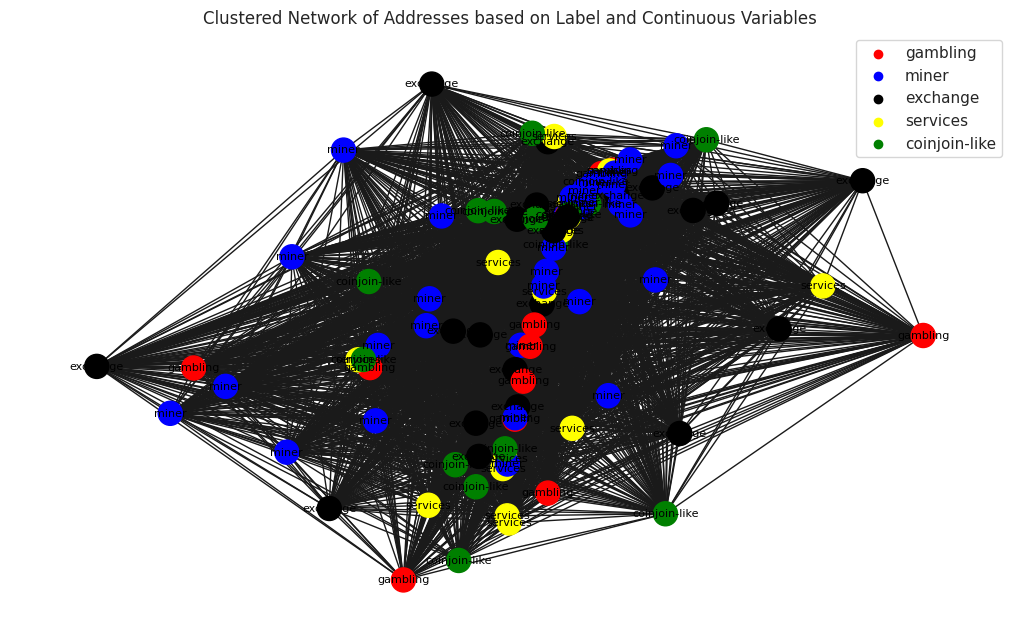

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create an example DataFrame (replace with your actual DataFrame)

df = bitcoin

# Create a graph
G = nx.Graph()

# Add nodes for addresses
for index, row in df.iterrows():
    G.add_node(row['address'], label=row['label'])

# Add edges based on similarity (for illustration purposes)
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:
            similarity = abs(df[df['address'] == node1]['fee_mean'].values[0] -
                             df[df['address'] == node2]['fee_mean'].values[0]) + \
                         abs(df[df['address'] == node1]['size_mean'].values[0] -
                             df[df['address'] == node2]['size_mean'].values[0])
            G.add_edge(node1, node2, weight=similarity)

# Define node positions (replace this with your preferred layout)
pos = nx.spring_layout(G)

# Create a mapping of labels to colors
label_color_map = {'gambling': 'red', 'miner': 'blue', 'exchange': 'black', 'services': 'yellow', 'coinjoin-like': 'green'}

# Create a list of node colors based on labels
node_colors = [label_color_map[G.nodes[node]['label']] for node in G.nodes()]

# Draw the network with legend
plt.figure(figsize=(10, 6))
nx.draw(G, pos, node_color=node_colors, with_labels=True, font_size=8,
        font_color='black', labels={node: G.nodes[node]['label'] for node in G.nodes()})
plt.title('Clustered Network of Addresses based on Label and Continuous Variables')
# Create a legend manually
for label, color in label_color_map.items():
    plt.scatter([], [], c=color, label=label)
plt.legend()
plt.show()
